In [1]:
# Shows usage of lxml for parsing webpages
# Has examples of fuzzy match using SequenceMatcher
# Has examples of pandas_profiling library
# Has examples of re library
## Q1) Most busy Venues
## Q2) Most busy Addresses
## Q3) Most busy months

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from datetime import datetime
from dateutil.parser import parse
import pandas_profiling as pp
from difflib import SequenceMatcher as SM
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [4]:
#Uses xpath to seperate sections of data
'''from lxml import html
import requests

base_url = 'http://washington.org/find-dc-listings/dc-events?start='
urllist = []
results = []

for i in range(1,19):
    urllist.append(base_url+str(i))
print urllist
    
for url in urllist:
    page = requests.get(url)
    tree = html.fromstring(page.content)

    content = tree.xpath('//div[@class="content"]//text()')

    left = tree.xpath('//*[starts-with(@class, "event-grid-container-left")]')
    middle = tree.xpath('//*[starts-with(@class, "event-grid-container-middle")]')
    right = tree.xpath('//*[starts-with(@class, "event-grid-container-right")]')

    for i in range(0,len(left)):
        event = left[i].xpath('./div//a/text()')
        dat = middle[i].xpath('./div//text()')[0]
        venue = right[i].xpath('./div[1]//text()') or "NA"
        address = right[i].xpath('./div[position()>1 and position() < 3]//text()')
        results.append(event)
        results.append(dat)
        results.append(venue)
        results.append(address)
        #print results'''

'from lxml import html\nimport requests\n\nbase_url = \'http://washington.org/find-dc-listings/dc-events?start=\'\nurllist = []\nresults = []\n\nfor i in range(1,19):\n    urllist.append(base_url+str(i))\nprint urllist\n    \nfor url in urllist:\n    page = requests.get(url)\n    tree = html.fromstring(page.content)\n\n    content = tree.xpath(\'//div[@class="content"]//text()\')\n\n    left = tree.xpath(\'//*[starts-with(@class, "event-grid-container-left")]\')\n    middle = tree.xpath(\'//*[starts-with(@class, "event-grid-container-middle")]\')\n    right = tree.xpath(\'//*[starts-with(@class, "event-grid-container-right")]\')\n\n    for i in range(0,len(left)):\n        event = left[i].xpath(\'./div//a/text()\')\n        dat = middle[i].xpath(\'./div//text()\')[0]\n        venue = right[i].xpath(\'./div[1]//text()\') or "NA"\n        address = right[i].xpath(\'./div[position()>1 and position() < 3]//text()\')\n        results.append(event)\n        results.append(dat)\n        resul

In [5]:
# Since above program is time consuming, the results are stored beforehand.
results = [['She Who Tells a Story Opening Reception', 'View Details'], 'April 7, 2016', 'NA', ['1250 New York Avenue NW', 'Washington, ', 'DC'], ['Opening Reception: Dean Fisher: Recent Work', 'View Details'], 'April 8, 2016', ['Susan Calloway Fine Arts'], ['1643 Wisconsin Ave NW', 'Washington, ', 'DC', 'Georgetown'], ['Slow Art Day', 'View Details'], 'April 9, 2016', 'NA', ['1250 New York Avenue NW', 'Washington, ', 'DC'], ['Pivotal Encounters: 3 One Act Plays About Family Surprises', 'View Details'], 'April 9 - 10, 2016', 'NA', ['2438 18th St. NW', 'Washington, ', 'DC'], ['The Lion', 'View Details'], 'Now Until April 10, 2016', ['Arena Stage at the Mead Center for American Theater'], ['1101 Sixth St. SW', 'Washington, ', 'DC', 'Southwest Waterfront'], ['Freestyle Funny Comedy Show at the DC Improv', 'View Details'], 'April 10, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], [u'Spring Makers\u2019 Mart Arts and Craft Show', 'View Details'], 'April 10 - 12, 2016', ['National Museum of Women in the Arts'], ['1250 New York Avenue, NW', 'Washington, ', 'DC', 'Downtown/Penn Quarter/Chinatown'], ['The Mystery of Love & Sex', 'View Details'], 'Now Until April 13, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA'], ['Playworks DC Rock Paper Scissors Tournament', 'View Details'], 'April 13, 2016', ['Penn Social'], ['801 E St NW', 'Washington, ', 'DC'], ['Murder Mystery Comedy Show at the DC Imporov', 'View Details'], 'April 14, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['2016 Hospice Comes to Washington DC', 'View Details'], 'April 12 - 14, 2016', 'NA', ['3000 Pennsylvania Ave. SE', 'Washington, ', 'DC'], ['ICE performs the work of Anna Thorvaldsdottir', 'View Details'], 'April 14, 2016', ['The Phillips Collection Music Room'], ['1600 21st St NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Art Exhibition Carol Brown Goldberg', 'View Details'], 'Now Until April 14, 2016', ['Addison/Ripley Fine Art'], ['1670 Wisconsin Ave., NW', 'Washington, ', 'DC'], ['Lunchtime Lecture: Eighteenth Century Board Games', 'View Details'], 'April 15, 2016', ['Anderson House - The Amer. Revolution Institute of the Society of the Cincinnati'], ['2118 Massachusetts Avenue, NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Concerts at Claras: Kate Saylor and Garrett Wren', 'View Details'], 'April 15, 2016', ['Clara Barton Missing Soldiers Office Museum'], ['437 7th Street, NW', 'Washington, ', 'DC', 'Downtown/Penn Quarter/Chinatown'], ['Wood Chickens On Tour', 'View Details'], 'April 15, 2016', 'NA', ['2408 Wisconsin Ave NW', 'Washington, ', 'DC'], ['All the Way: A Panel on the Forces That Shaped the Passage of the Civil Rights Act', 'View Details'], 'April 16, 2016', 'NA', ['1101 Sixth St. SW', 'Washington, ', 'DC'], ['Events DC Presents Cherry Blast', 'View Details'], 'April 16, 2016', ['Carnegie Library'], ['801 K Street NW', 'Washington, ', 'DC', 'Downtown/Penn Quarter/Chinatown'], ['Cherry Blossom Dining Cruises', 'View Details'], 'Now Until April 17, 2016', ['Odyssey and Spirit Cruises'], ['600 Water Street SW', 'Washington, ', 'DC', 'Southwest Waterfront'], ['Cherry Blossom Sightseeing Cruises', 'View Details'], 'Now Until April 17, 2016', ['Elite Private Yachts'], ['600 Water Street SW', 'Washington, ', 'DC', 'Southwest Waterfront'], ['Comedian Rod Man at the DC Improv', 'View Details'], 'April 15 - 17, 2016', 'NA', ['1140 Connecticut Ave NW', 'Washington, ', 'DC'], ['Anacostia River Festival', 'View Details'], 'April 17, 2016', 'NA', ['Good Hope Road and Anacostia Drive SE', 'Washington, ', 'DC', 'Anacostia'], ['Immortals and Fishermen: Poetry, Painting, Calligraphy in the Wu School', 'View Details'], 'April 17, 2016', 'NA', ['1050 Independence Avenue SW', 'Washington, ', 'DC'], ['Lecture: American Prisoners of War in the Revolutionary South', 'View Details'], 'April 19, 2016', ['Anderson House - The Amer. Revolution Institute of the Society of the Cincinnati'], ['2118 Massachusetts Avenue, NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Comedian Chingo Bling at the DC Improv', 'View Details'], 'April 20, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['The Flick', 'View Details'], 'Now Until April 20, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['Restoring Clara Bartons Missing Soldiers Office', 'View Details'], 'April 20, 2016', ['Clara Barton Missing Soldiers Office Museum'], ['437 7th Street, NW', 'Washington, ', 'DC', 'Downtown/Penn Quarter/Chinatown'], [u'Spy School Workshop: Surveillance 101 with Eric O\u2019Neill', 'View Details'], 'April 22, 2016', ['International Spy Museum'], ['800 F Street, NW', 'Washington, ', 'DC'], ['The Flick', 'View Details'], 'Now Until April 23, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA'], ['The Rat Pack', 'View Details'], 'April 19 - 23, 2016', ['Signature Theatre'], ['4200 Campbell ave', 'Arlington, ', 'VA', 'Virginia'], ['Meet the Artisan Tours', 'View Details'], 'Now Until April 24, 2016', ['Arthur M. Sackler Gallery'], ['1050 Independence Ave SW', 'Washington, ', 'DC'], ['Mount Vernon Excursion Kick-Off Weekend', 'View Details'], 'April 23 - 24, 2016', ['Spirit of Mount Vernon'], ['600 Water Street SW', 'Washington, ', 'DC', 'Southwest Waterfront'], ['Comedian Craig Robinson at the DC Improv', 'View Details'], 'April 22 - 24, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['I Am Anne Hutchinson/I Am Harvey Milk', 'View Details'], 'April 23 - 24, 2016', ['The Music Center at Strathmore'], ['5301 Tuckerman Lane', 'North Bethesda, ', 'MD', 'Maryland'], ['The Flick', 'View Details'], 'Now Until April 24, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['The Flick', 'View Details'], 'Now Until April 24, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['Smithsonian Craft Show', 'View Details'], 'April 21 - 24, 2016', ['The National Building Museum'], ['401 F Street NW', 'Washington, ', 'DC'], ['Sports Stories from Finland Exhibition', 'View Details'], 'Now Until April 24, 2016', ['Embassy  of Finland'], ['3301 Massachusetts Avenue NW', 'Washington, ', 'DC', 'Woodley Park / Cleveland Park '], ['DC International Film Festival', 'View Details'], 'April 14 - 24, 2016', 'NA', ['555 11th Street, NW', 'Washington, ', 'DC'], ['Symbolic Cities', 'View Details'], 'April 26, 2016', ['Freer and Sackler Galleries'], ['1050 Independence Avenue SW', 'Washington, ', 'DC'], ['Playing to the Edge with General Michael Hayden', 'View Details'], 'April 27, 2016', ['International Spy Museum'], ['800 F Street, NW', 'Washington, ', 'DC'], ['Comedian Doug Benson at the DC Improv', 'View Details'], 'April 28, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['2016 Spring Gala', 'View Details'], 'April 29, 2016', 'NA', ['1250 New York Avenue NW', 'Washington, ', 'DC'], ['Comedian Nikki Glaser at the DC Improv', 'View Details'], 'April 29 - 30, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Discovering Clara Bartons Missing Soldiers Office', 'View Details'], 'April 30, 2016', ['Clara Barton Missing Soldiers Office Museum'], ['437 7th Street NW', 'Washington, ', 'DC', 'Downtown/Penn Quarter/Chinatown'], ['Revolutionary War Encampment', 'View Details'], 'April 30 - May 1, 2016', ["George Washington's Mount Vernon"], ['3200 Mount Vernon Memorial Highway', 'Mount Vernon, ', 'VA'], ['Salon Style: French Portraits from the Collection', 'View Details'], 'Now Until May 1, 2016', 'NA', ['1250 New York Avenue NW', 'Washington, ', 'DC', 'Downtown/Penn Quarter/Chinatown'], ['Literary Hill BookFest 2016', 'View Details'], 'May 1, 2016', ['Eastern Market, North Hall'], ['225 7th Street SE', 'Washington, ', 'DC', 'Capitol Hill'], ['Stella Artois presents #Girlsondeck', 'View Details'], 'Now Until May 3, 2016', ['Marvin'], ['2007 14th Street NW', 'Washington, ', 'DC', 'Arts District / U Street / Shaw'], ['Medium Cindy Kaza at the DC Improv', 'View Details'], 'May 4, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Medium Cindy Kaza at the DC Improv', 'View Details'], 'May 4, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['The Mystery of Love & Sex', 'View Details'], 'April 20 - May 4, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['Star Wars or Spy Wars: Who Needs the Force When You Have Good Intel?', 'View Details'], 'May 4, 2016', ['International Spy Museum'], ['800 F Street, NW', 'Washington, ', 'DC'], ['Passport DC: Around the World Embassy Hop!', 'View Details'], 'May 7, 2016', ['Smithsonian Anacostia Community Museum'], ['1901 Fort Place SE', 'Washington, ', 'DC'], ['The Mystery of Love & Sex', 'View Details'], 'Now Until May 7, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['All The Way', 'View Details'], 'Now Until May 8, 2016', ['Arena Stage at the Mead Center for American Theater'], ['1101 Sixth St. SW', 'Washington, ', 'DC', 'Southwest Waterfront'], ['Comedian Ian Bagg at the DC Improv', 'View Details'], 'May 5 - 8, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC'], ['The Mystery of Love & Sex', 'View Details'], 'April 10 - May 8, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['The Mystery of Love & Sex', 'View Details'], 'April 10 - May 8, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['Rockville Fine Arts Festival', 'View Details'], 'May 7 - 8, 2016', ['Rockville Towne Square'], ['200 East Middle Lane', 'Rockville, ', 'MD'], ['Rockville Fine Arts Festival', 'View Details'], 'May 7 - 8, 2016', ['Rockville Towne Square'], ['200 East Middle Lane', 'Rockville, ', 'MD'], [u'The Winter Fortress, The Epic Mission to Sabotage Hitler\u2019s Atomic Bomb: An Evening with Neal Bascomb', 'View Details'], 'May 11, 2016', 'NA', ['800 F Street, NW', 'Washington, ', 'DC'], ['ZooFari', 'View Details'], 'May 14, 2016', ['the National Zoo'], ['3001 Connecticut Ave NW', 'Washington, ', 'DC', 'Woodley Park / Cleveland Park '], ['Comedian Big Jay Oakerson at the DC Improv', 'View Details'], 'May 12 - 15, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Cathedral Choral Society: Fantastic Beethoven', 'View Details'], 'May 15, 2016', ['Washington National Cathedral'], ['3101 Wisconsin Ave. NW,', 'Washington, ', 'DC', 'Woodley Park / Cleveland Park '], ['Authors Talk: Washingtons Immortals: The Untold Story of an Elite Regiment Who changed the Course of the Revolution', 'View Details'], 'May 17, 2016', ['Anderson House - The Amer. Revolution Institute of the Society of the Cincinnati'], ['2118 Massachusetts Avenue, NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Anatomy of Malice: The Enigma of the Nazi War Criminals', 'View Details'], 'May 19, 2016', 'NA', ['800 F Street, NW', 'Washington, ', 'DC'], ['Lunchtime Lecture: A portrait miniature of General Henry Clinton', 'View Details'], 'May 20, 2016', ['Anderson House - The American Revolution Institute of the Society of the Cincinnati'], ['2118 Massachusetts Avenue, NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Artist Studio Tour', 'View Details'], 'May 21, 2016', ['Smithsonian Anacostia Community Museum'], ['1901 Fort Place SE', 'Washington, ', 'DC'], ['Comedian Bert Kreischer at the DC Improv', 'View Details'], 'May 19 - 21, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Ready or Not: A Lauryn Hill Tribute Party', 'View Details'], 'May 21, 2016', ['Marvin'], ['2007 14th Street NW', 'Washington, ', 'DC', 'Arts District / U Street / Shaw'], ['Childrens Book Reading and Signing with Author Sara Pascoe for Oswald the Almost Famous Opossum', 'View Details'], 'May 22, 2016', ['Upshur Street Books'], ['827 Upshur St NW,', 'Washington, ', 'DC'], ['Edward Sharpe and The Magnetic Zeros with Preservation Hall Jazz Band', 'View Details'], 'May 25, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA'], ['A Prairie Home Companion with Garrison Keillor', 'View Details'], 'May 27, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Dan Treado: You Are Getting Sleepy', 'View Details'], 'April 22 - May 28, 2016', ['Addison/Ripley Fine Art'], ['1670 Wisconsin Ave., NW', 'Washington, ', 'DC'], ['A Prairie Home Companion With Garrison Keillor', 'View Details'], 'May 28, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Disgraced', 'View Details'], 'April 22 - May 29, 2016', ['Arena Stage at the Mead Center for American Theater'], ['1101 Sixth St. SW', 'Washington, ', 'DC', 'Southwest Waterfront'], ['The Great Outdoors with Steven Blier & Wolf Trap Opera Soloists', 'View Details'], 'May 28 - 29, 2016', ['Wolf Trap'], ['1635 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Comedian Michael Blackson at the DC Improv', 'View Details'], 'May 26 - 29, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Cyndi Lauper and Boy George', 'View Details'], 'June 1, 2016', ['Wolf Trap'], ['15551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Cyndi Lauper and Boy George', 'View Details'], 'June 1, 2016', ['Wolf Trap'], ['15551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['John Prine with Patty Griffin', 'View Details'], 'June 3, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['SOJA with Wale and Allen Stone', 'View Details'], 'June 4, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Comedian Jake Johannsen at the DC Improv', 'View Details'], 'June 2 - 5, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Lord Huron and Nathaniel Rateliff & The Night Sweats with Oh Pep!', 'View Details'], 'June 7, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Lunchtime Lecture: Isabel Andersons wedding dress, by conservator Katherine Hill Winters', 'View Details'], 'June 10, 2016', ['Anderson House - The American Revolution Institute of the Society of the Cincinnati'], ['2118 Massachusetts Avenue, NW', 'Washington, ', 'DC', 'Dupont Circle'], ['The Rape of Lucretia - Wolf Trap Opera', 'View Details'], 'June 10, 2016', ['The Barns'], ['1635 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Comedian Bobby Slayton at the DC Improv Comedy Lounge', 'View Details'], 'June 10 - 11, 2016', ['DC Improv Comedy Club & Restaurant'], ['1140 Connecticut Avenue NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Ragtime The Musical', 'View Details'], 'June 9 - 11, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Ragtime The Musical', 'View Details'], 'June 11, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Cathedral Sings: Schubert is Great', 'View Details'], 'June 12, 2016', ['Washington National Cathedral'], ['3101 Wisconsin Ave. NW', 'Washington, ', 'DC', 'Woodley Park / Cleveland Park '], ['The Rape of Lucretia - Wolf Trap Opera', 'View Details'], 'June 12, 2016', ['The Barns'], ['1635 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Flight of the Conchords Sing Flight of the Conchords', 'View Details'], 'June 13, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Jackson Browne', 'View Details'], 'June 14, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Barenaked Ladies with OMD and Howard Jones', 'View Details'], 'June 15, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], [u'Authors Talk: Braddock\u2019s Defeat: The Battle of the Monongahela and the Road to Revolution, by David Preston', 'View Details'], 'June 15, 2016', ['Anderson House - The American Revolution Institute of the Society of the Cincinnati'], ['2118 Massachusetts Avenue, NW', 'Washington, ', 'DC', 'Dupont Circle'], ['The Rape of Lucretia - Wolf Trap Opera', 'View Details'], 'June 15, 2016', ['The Barns'], ['1635 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Lake Street Dive with The Lone Bellow', 'View Details'], 'June 16, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Kenny Rogers With Special Guest Linda Davis', 'View Details'], 'June 17, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Harry Connick Jr.', 'View Details'], 'June 18, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA'], ['Make Em Laugh', 'View Details'], 'June 14 - 18, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['Washington DC Preeclampsia Promise Walk 5K Fun Run', 'View Details'], 'June 18, 2016', ['National Mall'], ['National Mall', 'Washington, ', 'DC'], ['2016 DMV Cornhole and Beer Fest', 'View Details'], 'June 18, 2016', 'NA', ['Half Street Fairgrounds', 'Washington, ', 'DC'], ['The Rape of Lucretia - Wolf Trap Opera', 'View Details'], 'June 18, 2016', ['The Barns'], ['1635 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Fathers Day Weekend at Mount Vernon', 'View Details'], 'June 18 - 19, 2016', ["George Washington's Mount Vernon"], ['3200 Mount Vernon Memorial Highway', 'Mount Vernon, ', 'VA'], ['Studio Spotlight', 'View Details'], 'June 19, 2016', ['The Barns'], ['1635 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Comedian Chris DElia at the DC Improv', 'View Details'], 'June 15 - 19, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Ray LaMontagne', 'View Details'], 'June 19, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Comedian Aries Spears at the DC Improv', 'View Details'], 'June 23 - 26, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Comedian Aries Spears at the DC Improv', 'View Details'], 'June 23 - 26, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Aria Jukebox', 'View Details'], 'June 26, 2016', ['The Barns'], ['1635 Trap Road', 'Vienna, ', 'VA'], ['Riverdance - The 20th Anniversary World Tour', 'View Details'], 'June 23 - 26, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Riverdance - The 20th Anniversary World Tour', 'View Details'], 'June 25 - 26, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Paul Simon', 'View Details'], 'June 27 - 28, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Asha Bhosle - The Farewell Tour', 'View Details'], 'June 29, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['DC Happy Hour', 'View Details'], 'Now Until June 30, 2016', ['Mango Tree DC'], ['929 h street nw', 'washington, ', 'DC'], ['DreamWorks Animation in Concert with National Symphony Orchestra', 'View Details'], 'June 30, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['America the Beautiful with National Symphony Orchestra', 'View Details'], 'July 1, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Mary Chapin Carpenter', 'View Details'], 'July 2, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Comedian DeRay Davis at the DC Improv', 'View Details'], 'June 30 - July 3, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['An American Celebration at Mount Vernon', 'View Details'], 'July 4, 2016', ["George Washington's Mount Vernon"], ['3200 Mount Vernon Memorial Highway', 'Mount Vernon, ', 'VA'], ['La Cage aux Folles', 'View Details'], 'May 31 - July 6, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['Pat Benatar & Neil Giraldo and Melissa Etheridge', 'View Details'], 'July 7, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Yuja Wang, piano with National Symphony Orchestra', 'View Details'], 'July 8, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['La Cage aux Folles', 'View Details'], 'June 2 - July 9, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['Comedian Frank Caliendo at the DC Improv', 'View Details'], 'July 7 - 9, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Raiders of the Lost Ark with National Symphony Orchestra', 'View Details'], 'July 9, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['WONDER', 'View Details'], 'Now Until July 10, 2016', ['Renwick Gallery'], ['1661 Pennsylvania Avenue', 'Washington, ', 'DC'], ['La Cage Aux Folles', 'View Details'], 'June 5 - July 10, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['La Cage aux Folles', 'View Details'], 'June 19 - July 10, 2016', ['Signature Theatre'], ['4200 Campbell Ave', 'Arlington, ', 'VA', 'Virginia'], ['Lecture: The Anti-Suffrage Movement in the Early 20th Century, by Susan Goodier', 'View Details'], 'July 12, 2016', ['Anderson House - The American Revolution Institute of the Society of the Cincinnati'], ['2118 Massachusetts Avenue, NW', 'Washington, ', 'DC', 'Dupont Circle'], ['American Ballet Theatre - Romeo and Juliet', 'View Details'], 'July 14 - 16, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Comedian John Witherspoon at the DC Improv', 'View Details'], 'July 14 - 17, 2016', ['DC Improv'], ['1140 Connecticut Ave NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Tedeschi Trucks Band with Los Lobos and North Mississippi Allstars', 'View Details'], 'July 17, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Wait Wait...Dont Tell Me!', 'View Details'], 'July 21, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Sufjan Stevens', 'View Details'], 'July 22, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['The Firebird with National Symphony Orchestra and Janni Younge of Handspring Puppet Company', 'View Details'], 'July 23, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Pink Martini with National Symphony Orchestra featuring Storm Large & Special Guest Ari Shapiro', 'View Details'], 'July 24, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Painting with Words: Gentleman Artists of the Ming Dynasty', 'View Details'], 'April 16 - July 24, 2016', ['Freer and Sackler Galleries'], ['1050 Independence Avenue SW', 'Washington, ', 'DC'], ['Huey Lewis & The News', 'View Details'], 'July 26, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Jeff Beck & Buddy Guy', 'View Details'], 'July 27, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Tony Bennett', 'View Details'], 'July 28, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Chad Hoopes, violin with National Symphony Orchestra', 'View Details'], 'July 29, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA'], ['She Who Tells a Story: Women Photographers from Iran and the Arab World', 'View Details'], 'April 8 - July 31, 2016', ['National Museum of Women in the Arts'], ['1250 New York Avenue, NW', 'Washington, ', 'DC', 'Downtown/Penn Quarter/Chinatown'], ['Straight No Chaser - The New Old Fashioned Tour', 'View Details'], 'August 4, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Spy Camp: Session 1', 'View Details'], 'August 1 - 5, 2016', ['International Spy Museum'], ['800 F Street, NW', 'Washington, ', 'DC'], [u'La boh\xe8me with Wolf Trap Opera and National Symphony Orchestra', 'View Details'], 'August 5, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Seth MacFarlane with National Symphony Orchestra', 'View Details'], 'August 6, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['The Band Perry', 'View Details'], 'August 7, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Phillip Phillips and Matt Nathanson with A Great Big World', 'View Details'], 'August 10, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['The Silk Road Ensemble with Yo-Yo Ma', 'View Details'], 'August 11, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Spy Camp: Session 2', 'View Details'], 'August 8 - 12, 2016', ['International Spy Museum'], ['800 F Street, NW', 'Washington, ', 'DC'], ['Lyle Lovett & His Large Band and Emmylou Harris', 'View Details'], 'August 12, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Classic Albums Live Presents David Bowie - The Rise and Fall of Ziggy Stardust and the Spiders from Mars', 'View Details'], 'August 14, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Jazz at Lincoln Center Orchestra with Wynton Marsalis', 'View Details'], 'August 19, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Ira Glass - Seven Things Ive Learned', 'View Details'], 'August 20, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Kristin Chenoweth', 'View Details'], 'August 21, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['NEEDTOBREATHES TOUR DE COMPADRES - NEEDTOBREATHE, Mat Kearney, John Mark McMillan, Welshly Arms', 'View Details'], 'August 22, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Goo Goo Dolls with Collective Soul and Tribe Society', 'View Details'], 'August 23, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Bonnie Raitt with Richard Thompson Trio', 'View Details'], 'August 27, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Chicago', 'View Details'], 'September 1, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], [u'I LOVE THE 90S featuring Salt-N-Pepa with Spinderella, All-4-One, Color Me Badd, Coolio, Tone L\u014dc, Rob Base, Young MC', 'View Details'], 'September 3, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Gentleman Distiller: Whiskey Tasting & Dinner', 'View Details'], 'September 9, 2016', ["George Washington's Mount Vernon"], ['3200 Mount Vernon Memorial Highway', 'Mount Vernon, ', 'VA', 'Virginia'], ['Bryan Adams', 'View Details'], 'September 9, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Leon Bridges with Lianne La Havas', 'View Details'], 'September 10, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Weird Al Yankovic', 'View Details'], 'September 11, 2016', ['Wolf Trap'], ['1551 Trap Road', 'Vienna, ', 'VA', 'Virginia'], ['Symbolic Cities: The Work of Ahmed Mater', 'View Details'], 'Now Until September 18, 2016', ['Arthur M. Sackler Gallery'], ['1050 Independence Ave SW', 'Washington, ', 'DC'], ['Colonial Market & Fair', 'View Details'], 'September 17 - 18, 2016', ["George Washington's Mount Vernon"], ['3200 Mount Vernon Memorial Highway', 'Mount Vernon, ', 'VA', 'Virginia'], ['Franciscan Monastery Garden Tours', 'View Details'], 'Now Until September 24, 2016', ['Franciscan Monastery of the Holy Land'], ['1400 Quincy Street NE', 'Washington, ', 'DC', 'Brookland'], ['Authors Talk: Nathaniel Philbrick: Valiant Ambition: George Washington, Benedict Arnold, & the Fate of the American Revolution', 'View Details'], 'September 28, 2016', ['Anderson House - The American Revolution Institute of the Society of the Cincinnati'], ['2118 Massaschusetts Avenue, NW', 'Washington, ', 'DC', 'Dupont Circle'], ['Flora of the National Parks Art Exhibit', 'View Details'], 'Now Until October 2, 2016', ['United States Botanic Garden'], ['100 Maryland Avenue, SW', 'Washington, ', 'DC'], ['Fall Wine Festival & Sunset Tour', 'View Details'], 'October 7 - 9, 2016', ["George Washington's Mount Vernon"], ['3200 Mount Vernon Memorial Highway', 'Mount Vernon, ', 'VA', 'Virginia'], ['Brewing History: Beer Tasting, Tour & Dinner', 'View Details'], 'October 21, 2016', ["George Washington's Mount Vernon"], ['3200 Mount Vernon Memorial Highway', 'Mount Vernon, ', 'VA', 'Virginia'], ['Fall Harvest Family Days', 'View Details'], 'October 22 - 23, 2016', ["George Washington's Mount Vernon"], ['3200 Mount Vernon Memorial Highway', 'Mount Vernon, ', 'VA', 'Virginia'], ['Twelve Years that Shook and Shaped Washington: 1963-1975', 'View Details'], 'Now Until October 23, 2016', ['Smithsonian Anacostia Community Museum'], ['1901 Fort Place SE', 'Washington, ', 'DC'], ['Most Haunted Houses', 'View Details'], 'Now Until October 29, 2016', ['Octagon House'], ['1799 New York Avenue, NW', 'Washington, ', 'DC'], ['Mount Vernon Excursions', 'View Details'], 'Now Until October 30, 2016', ['Spirit of Mount Vernon'], ['600 Water Street SW', 'Washington, ', 'DC'], ['Trick-or-Treating at Mount Vernon', 'View Details'], 'October 29 - 31, 2016', ["George Washington's Mount Vernon"], ['3200 Mount Vernon Memorial Highway', 'Mount Vernon, ', 'VA', 'Virginia'], ['Filthy Lucre: Reimagining Whistlers Peacock Room', 'View Details'], 'Now Until November 29, 2016', ['Freer and Sackler Galleries'], ['1050 Independence Ave', 'Washington, ', 'DC'], ['Whistlers Peacock Room Re-Imagined at Freer Sackler Gallery', 'View Details'], 'Now Until November 29, 2016', ['Smithsonian Museum of Asian Art (Freer-Sackler Gallery)'], ['1050 Independence Avenue SW', 'Washington, ', 'DC', 'Downtown/Penn Quarter/Chinatown']]
len(results)

720

In [6]:
results_formatted = [results[i:i+4] for i in range(0,len(results),4)]
results_formatted[1]

[['Opening Reception: Dean Fisher: Recent Work', 'View Details'],
 'April 8, 2016',
 ['Susan Calloway Fine Arts'],
 ['1643 Wisconsin Ave NW', 'Washington, ', 'DC', 'Georgetown']]

In [7]:
# setting column names
df = pd.DataFrame(results_formatted)
df.columns=[['event','dat','venue','address']]
df.head(5)

,event,dat,venue,address
0,"[She Who Tells a Story Opening Reception, View...","April 7, 2016",NA,"[1250 New York Avenue NW, Washington, , DC]"
1,"[Opening Reception: Dean Fisher: Recent Work, ...","April 8, 2016",[Susan Calloway Fine Arts],"[1643 Wisconsin Ave NW, Washington, , DC, Geor..."
2,"[Slow Art Day, View Details]","April 9, 2016",NA,"[1250 New York Avenue NW, Washington, , DC]"
3,[Pivotal Encounters: 3 One Act Plays About Fam...,"April 9 - 10, 2016",NA,"[2438 18th St. NW, Washington, , DC]"
4,"[The Lion, View Details]","Now Until April 10, 2016",[Arena Stage at the Mead Center for American T...,"[1101 Sixth St. SW, Washington, , DC, Southwes..."


In [8]:
# cleanup to remove [ & ]
df.event = df.event.astype(str)
df.event=df.event.map(lambda x: x.replace('[','').replace(']',''))
df.venue = df.venue.astype(str)
df.venue=df.venue.map(lambda x: x.replace('[','').replace(']',''))
df.head(5)

,event,dat,venue,address
0,"'She Who Tells a Story Opening Reception', 'Vi...","April 7, 2016",NA,"[1250 New York Avenue NW, Washington, , DC]"
1,"'Opening Reception: Dean Fisher: Recent Work',...","April 8, 2016",'Susan Calloway Fine Arts',"[1643 Wisconsin Ave NW, Washington, , DC, Geor..."
2,"'Slow Art Day', 'View Details'","April 9, 2016",NA,"[1250 New York Avenue NW, Washington, , DC]"
3,'Pivotal Encounters: 3 One Act Plays About Fam...,"April 9 - 10, 2016",NA,"[2438 18th St. NW, Washington, , DC]"
4,"'The Lion', 'View Details'","Now Until April 10, 2016",'Arena Stage at the Mead Center for American T...,"[1101 Sixth St. SW, Washington, , DC, Southwes..."


In [9]:
# Top 10 busy avenues
df[df.venue != 'NA'].venue.value_counts().head(10)

'Wolf Trap'                                                                              57
'DC Improv'                                                                              19
'Signature Theatre'                                                                      15
"George Washington's Mount Vernon"                                                        9
'The Barns'                                                                               6
'Anderson House - The American Revolution Institute of the Society of the Cincinnati'     5
'International Spy Museum'                                                                5
'Smithsonian Anacostia Community Museum'                                                  3
'Anderson House - The Amer. Revolution Institute of the Society of the Cincinnati'        3
'Freer and Sackler Galleries'                                                             3
Name: venue, dtype: int64

In [10]:
# Fuzzy match score example 1
s1 ='Anderson House - The American Revolution Institute of the Society of the Cincinnati'
s2 = 'Anderson House - The Amer. Revolution Institute of the Society of the Cincinnati'
SM(None, s1, s2).ratio()

0.9693251533742331

In [11]:
# Fuzzy match score example 2
s3 ='DC Improv'
s4 ='DC Improv Comedy Club & Restaurant' 
SM(None, s1, s2).ratio()

0.9693251533742331

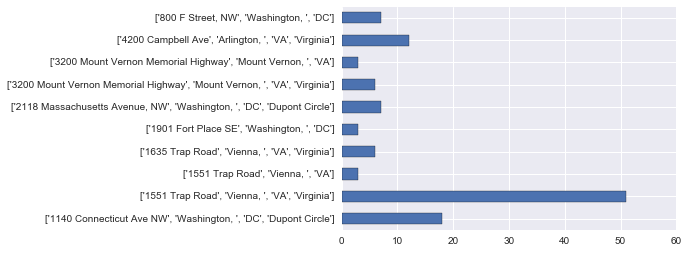

In [12]:
# Most frequent addresses
df.address= df.address.astype(str)
df.address.value_counts().head(10).sort_index().plot(kind='barh')

In [13]:
#profile report
pp.ProfileReport(df)

Number of variables,4
Number of observations,180
Total Missing (%),0.0%
Total size in memory,5.7 KiB
Average record size in memory,32.4 B
Numeric,0
Categorical,4
Date,0
Text (Unique),0
Rejected,0
Distinct count,57


In [14]:
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file(outputfile="myoutputfile.html")

In [15]:
#cleanup for finding busy months and comparing May, June & July
df.dat = df.dat.astype(str)
df.dat = df.dat.apply(lambda x: x.replace('Now Until ',''))
df.dat = df.dat.apply(lambda x: re.sub('-(.+?), ','',x))

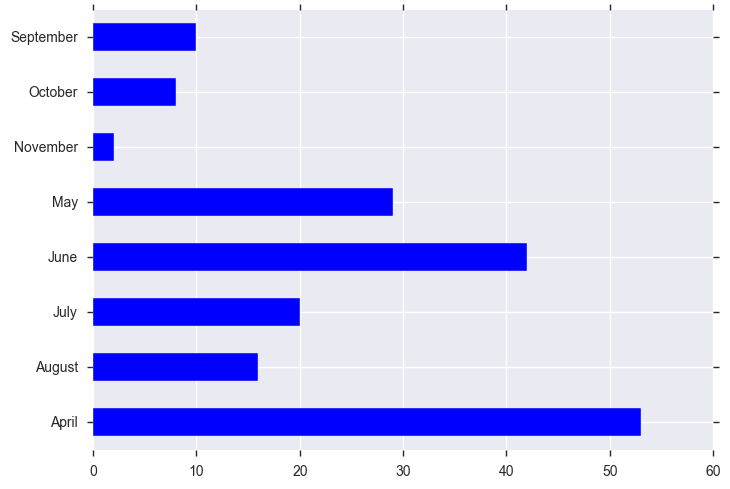

In [16]:
# Most busy months
df.dat.str.split().str[0].value_counts().sort_index().plot(kind='barh')